# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [50]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


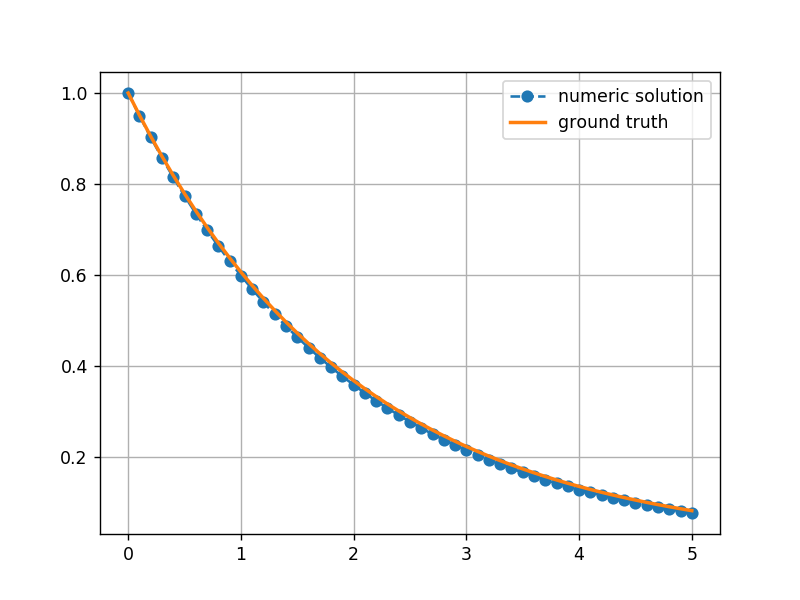

In [51]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


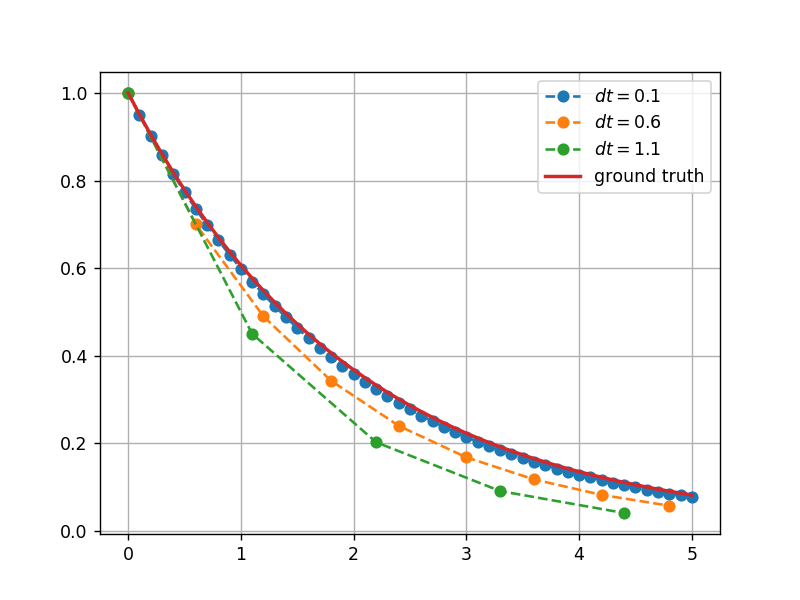

<IPython.core.display.Javascript object>


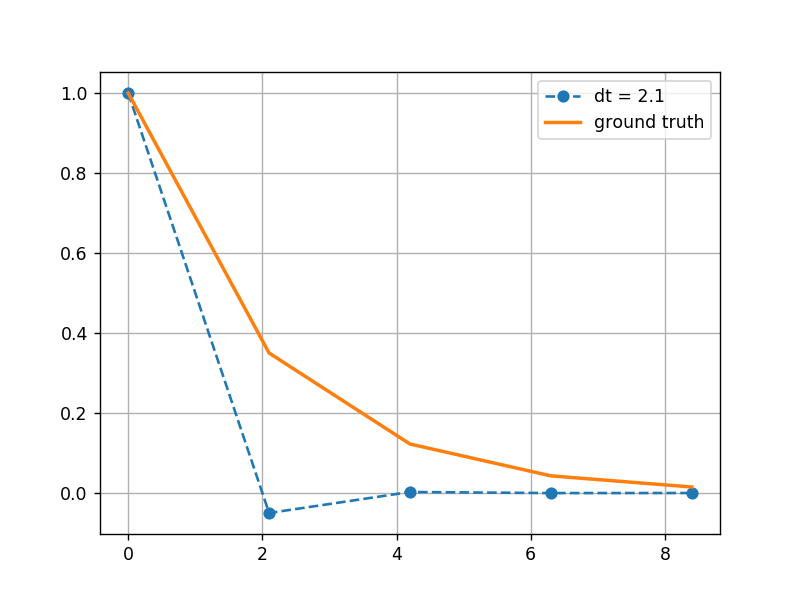

In [52]:
data = []
for i in range(3):
    data.append(euler_solve(lam, u0=1.0, T=5, dt=0.1+0.5*i))
    
plt.figure()
plt.plot(data[0][0], data[0][1], 'o--', label='$dt = 0.1$')
plt.plot(data[1][0], data[1][1], 'o--', label='$dt = 0.6$')
plt.plot(data[2][0], data[2][1], 'o--', label='$dt = 1.1$')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

tt1, y = euler_solve(lam, u0=1, T=10, dt=2.1)

plt.figure()
plt.plot(tt1, y, 'o--', label='dt = 2.1')
plt.plot(tt1, np.exp(lam*tt1), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [53]:
def euler_solve_implicit(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt*lam)
    return tt, y

<IPython.core.display.Javascript object>


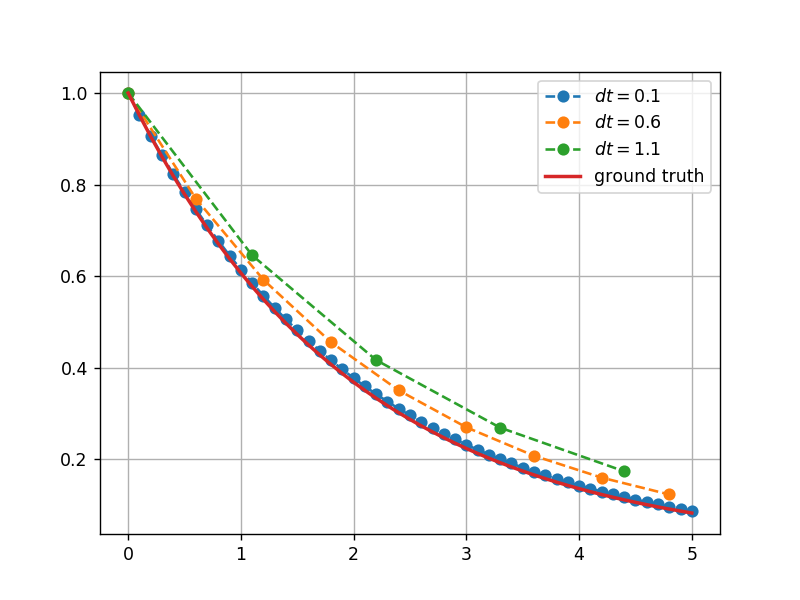

<IPython.core.display.Javascript object>


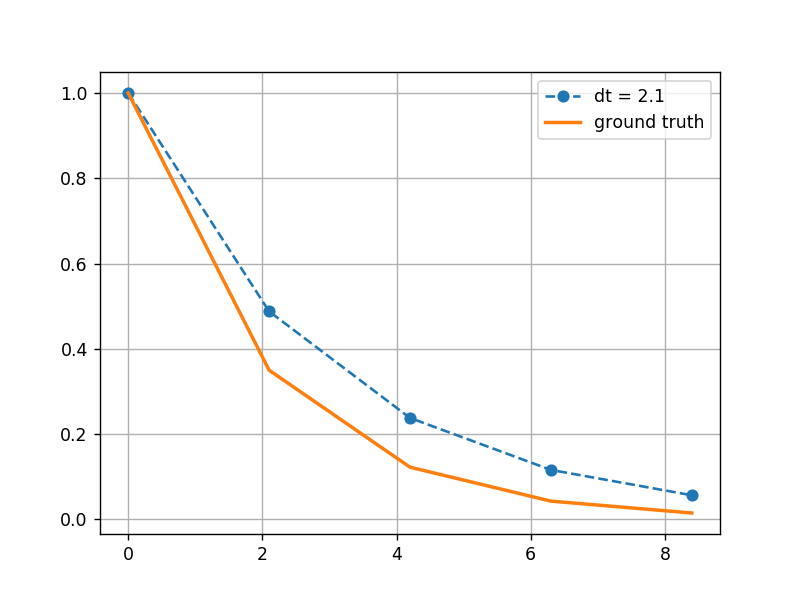

In [54]:
data = []
for i in range(3):
    data.append(euler_solve_implicit(lam, u0=1.0, T=5, dt=0.1+0.5*i))
    
plt.figure()
plt.plot(data[0][0], data[0][1], 'o--', label='$dt = 0.1$')
plt.plot(data[1][0], data[1][1], 'o--', label='$dt = 0.6$')
plt.plot(data[2][0], data[2][1], 'o--', label='$dt = 1.1$')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

tt1, y = euler_solve_implicit(lam, u0=1, T=10, dt=2.1)

plt.figure()
plt.plot(tt1, y, 'o--', label='dt = 2.1')
plt.plot(tt1, np.exp(lam*tt1), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Compare formulas for explicit and implicit Euler's methods:

Explicit:
$$y(t+\tau) = y(t) (1+\lambda \tau)$$

Exponent's expancion:
$$y(t+\tau) = y(t) + \frac{dy}{dt} \tau + \frac{1}{2} \frac{d^2 y}{dt^2} \tau^2 + ... = 
y(t) (1 + \lambda \tau + \frac{(\lambda \tau)^2}{2} + ...)$$

Implicit: 
$$y(t+\tau) = y(t) (1-\lambda \tau) = y(t) (1 + \lambda \tau + (\lambda \tau)^2 + ...)$$

Where we can see that explicit solution is under ground truth exponent and implicit solution always above exponent not depending on a value of the tau.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [36]:
def euler_solve_matrix_explicit(A, u00, u10, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    u0 = np.empty(num_steps+1)
    u1 = np.empty(num_steps+1)
    u0[0] = u00
    u1[0] = u10
    for k in range(num_steps):
        u0[k+1] = u0[k] + dt*A[0][0]*u0[k] + dt*A[0][1]*u1[k]
        u1[k+1] = u1[k] + dt*A[1][0]*u0[k] + dt*A[1][1]*u1[k]
    return tt, u0, u1

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

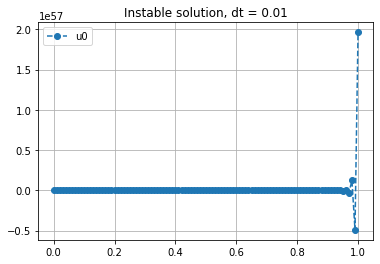

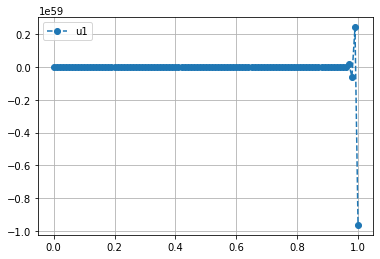

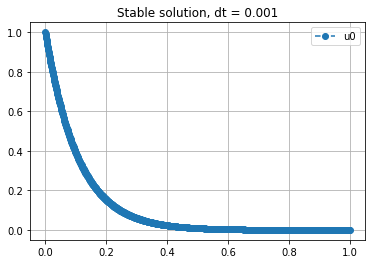

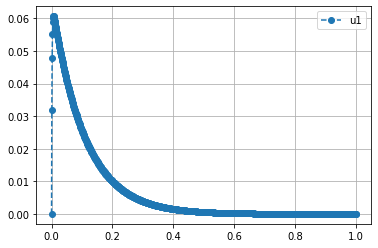

In [37]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[-10, 10], [32, -499]])
u = [1, 0]
tt, u0, u1 = euler_solve_matrix_explicit(A, u00=u[0], u10=u[1], T=1, dt=0.01)
plt.figure()
plt.title("Instable solution, dt = 0.01")
plt.plot(tt, u0, 'o--', label='u0')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.plot(tt, u1, 'o--', label='u1')
plt.legend(loc='best')
plt.grid(True)

tt, u0, u1 = euler_solve_matrix_explicit(A, u00=u[0], u10=u[1], T=1, dt=0.001)
plt.figure()
plt.title("Stable solution, dt = 0.001")
plt.plot(tt, u0, 'o--', label='u0')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.plot(tt, u1, 'o--', label='u1')
plt.legend(loc='best')
plt.grid(True)

In [5]:
print(np.linalg.eigvals(A))

[  -9.34647667 -499.65352333]


System is stiff. Ratio of eigenvalues is $\approx 50$. Value of acceptable $\tau$ is bounded by eigenvalue with the largest module.

For $\tau = 0.01$ explicit Euler's methods is instable.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [38]:
def euler_solve_matrix_implicit(A, u00, u10, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    u0 = np.empty(num_steps+1)
    u1 = np.empty(num_steps+1)
    u0[0] = u00
    u1[0] = u10
    """Solve M*x = b"""
    M = [[1-A[0][0]*dt, -A[0][1]*dt],[-A[1][0]*dt ,1-A[1][1]*dt]]
    b = [0, 0]
    for k in range(num_steps):
        b = [u0[k], u1[k]]
        sol = np.linalg.solve(M, b)
        u0[k+1], u1[k+1] = sol[0], sol[1]
    return tt, u0, u1

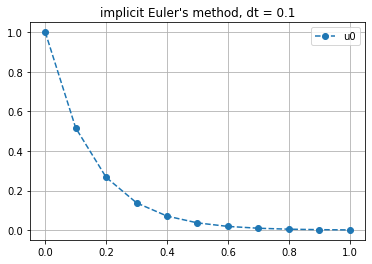

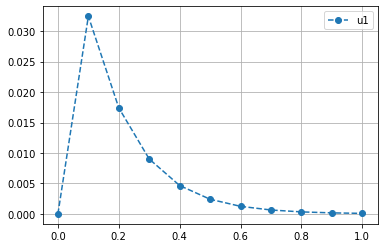

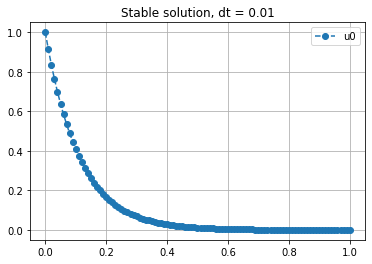

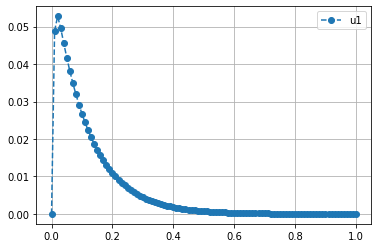

In [42]:
tt, u0, u1 = euler_solve_matrix_implicit(A, u00=u[0], u10=u[1], T=1, dt=0.1)
plt.figure()
plt.title("Implicit Euler's method, dt = 0.1")
plt.plot(tt, u0, 'o--', label='u0')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.plot(tt, u1, 'o--', label='u1')
plt.legend(loc='best')
plt.grid(True)

tt, u0, u1 = euler_solve_matrix_implicit(A, u00=u[0], u10=u[1], T=1, dt=0.01)
plt.figure()
plt.title("dt = 0.01")
plt.plot(tt, u0, 'o--', label='u0')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.plot(tt, u1, 'o--', label='u1')
plt.legend(loc='best')
plt.grid(True)

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Solve system

$$
\frac{d}{dt}\begin{pmatrix} u \\ \frac{du}{dt} \end{pmatrix} \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix} = 
\begin{pmatrix} u \\ \frac{du}{dt} \end{pmatrix}
$$

<IPython.core.display.Javascript object>


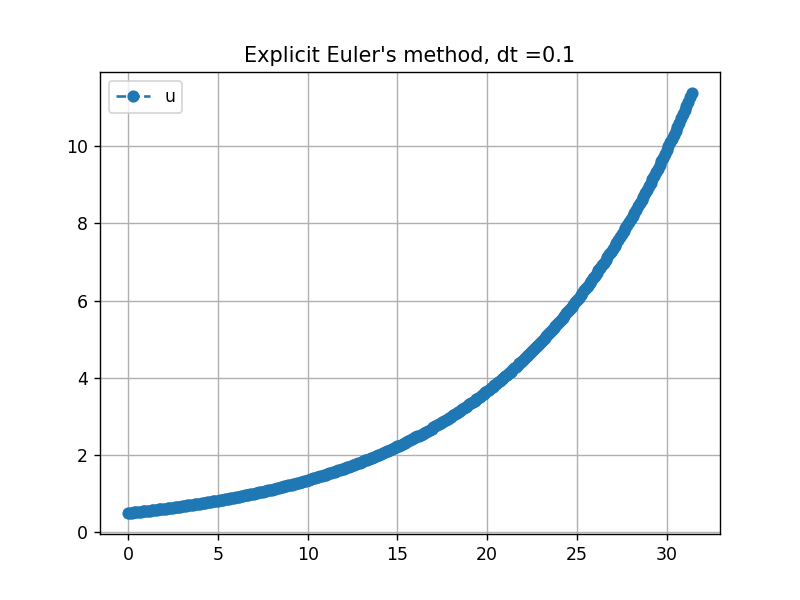

<IPython.core.display.Javascript object>


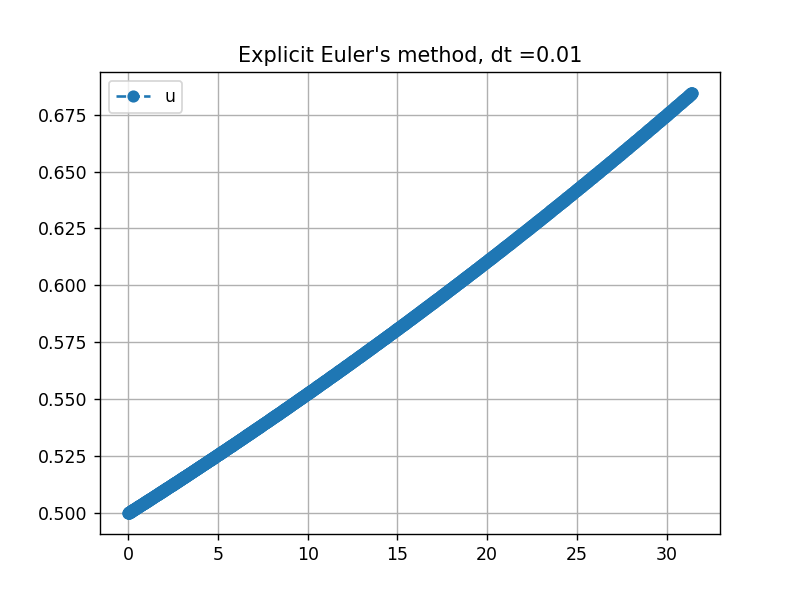

<IPython.core.display.Javascript object>


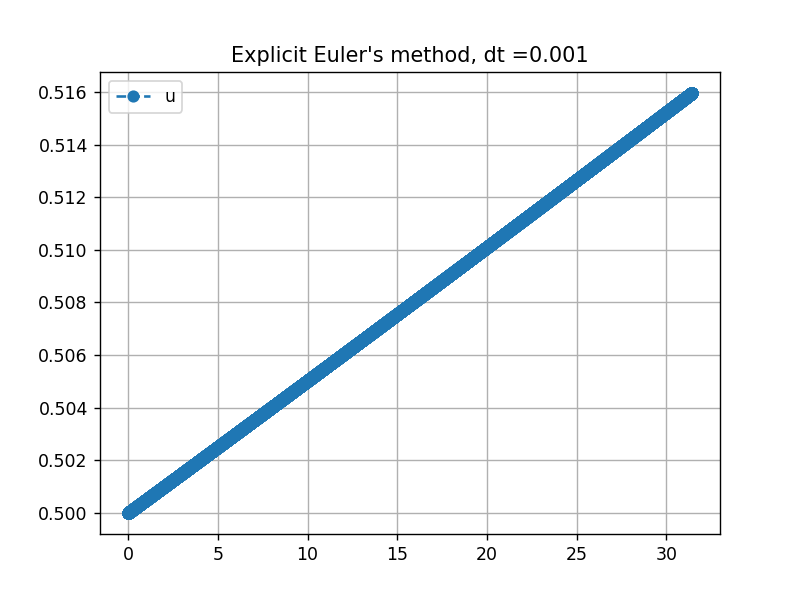

In [84]:
import math

omega = 1
A = [[0, 1],[-omega**2, 0]]
period = 2*math.pi/omega

for i in range(3):
    tt, u0, u1 = euler_solve_matrix_explicit(A, u00=u[0], u10=u[1], T=5*period, dt=0.1**(i+1))
    E = np.empty((tt.shape[0]))
    for j in range(tt.shape[0]):
        E[j] = (u1[j]**2)/2 + omega**(2)*(u0[j]**2)/2
    plt.figure()
    plt.title("Explicit Euler's method, dt =" + str(int(0.1**(i+1)*(10**(i+2)))/10**(i+2)))
    plt.plot(tt, E, 'o--', label='u')
    plt.legend(loc='best')
    plt.grid(True)


See the change of energy on the two time intervals and it's dependence from $\tau$.

<IPython.core.display.Javascript object>


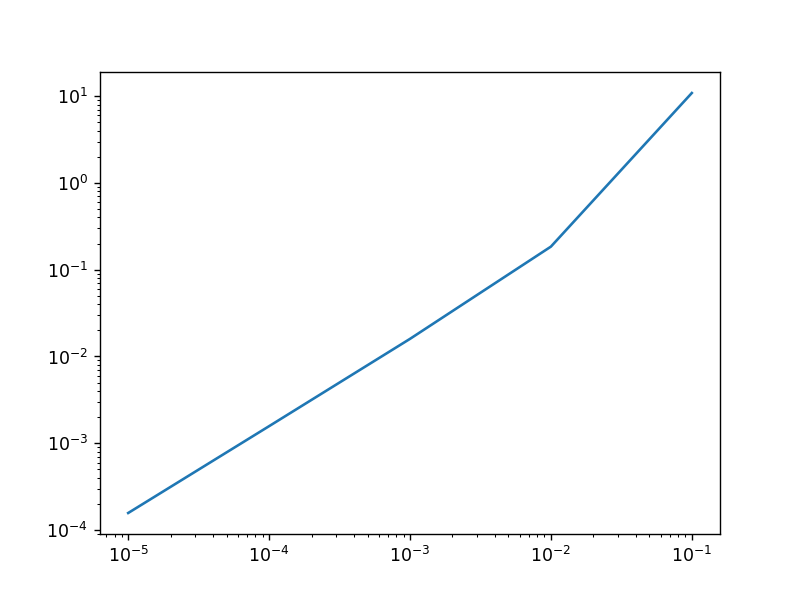

<IPython.core.display.Javascript object>


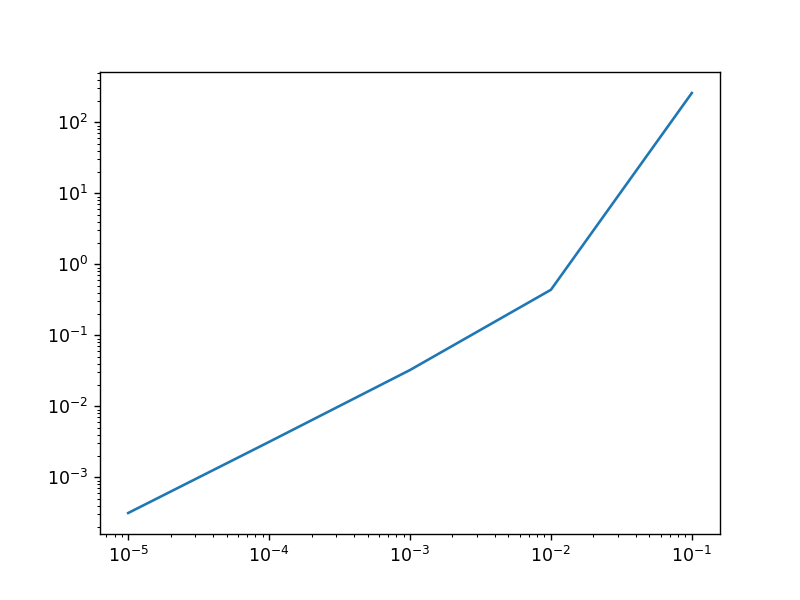

In [104]:
import pylab

deltaE = np.empty((5))
tau = np.empty((5))
for i in range(5):
    tt, u0, u1 = euler_solve_matrix_explicit(A, u00=u[0], u10=u[1], T=5*period, dt=0.1**(i+1))
    N = tt.shape[0] - 1
    deltaE[i] = (u1[N]**2)/2 + omega**(2)*(u0[N]**2)/2 - (u1[0]**2)/2 - omega**(2)*(u0[0]**2)/2
    tau[i] = 0.1**(i+1)
    
figure = pylab.figure()
axes = figure.add_subplot (1, 1, 1)
pylab.plot(tau, deltaE)
axes.set_yscale('log')
axes.set_xscale('log')
pylab.show()

"""Change time interval to T=10*period"""

deltaE = np.empty((5))
tau = np.empty((5))
for i in range(5):
    tt, u0, u1 = euler_solve_matrix_explicit(A, u00=u[0], u10=u[1], T=10*period, dt=0.1**(i+1))
    N = tt.shape[0] - 1
    deltaE[i] = (u1[N]**2)/2 + omega**(2)*(u0[N]**2)/2 - (u1[0]**2)/2 - omega**(2)*(u0[0]**2)/2
    tau[i] = 0.1**(i+1)
    
figure = pylab.figure()
axes = figure.add_subplot (1, 1, 1)
pylab.plot(tau, deltaE)
axes.set_xscale('log')
pylab.show()

Here can be seen that $\Delta E \sim \tau$, $E_0 = \frac{1}{2}$ . 

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [117]:
def RungeKutta_matrix(A, u00, u10, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    u0 = np.empty(num_steps+1)
    u1 = np.empty(num_steps+1)
    u0[0] = u00
    u1[0] = u10
    for j in range(num_steps):
        k11 = A[0][0]*u0[j] + A[0][1]*u1[j]
        k12 = A[1][0]*u0[j] + A[1][1]*u1[j]
        k21 = A[0][0]*(u0[j]+dt*k11/2) + A[0][1]*(u1[j]+dt*k12/2)
        k22 = A[1][0]*(u0[j]+dt*k11/2) + A[1][1]*(u1[j]+dt*k12/2)
        u0[j+1] = u0[j] + dt*k21
        u1[j+1] = u1[j] + dt*k22
    return tt, u0, u1

For Runge-Khutta scheme see the change of energy on the one time interval and it's dependence from $\tau$.

<IPython.core.display.Javascript object>


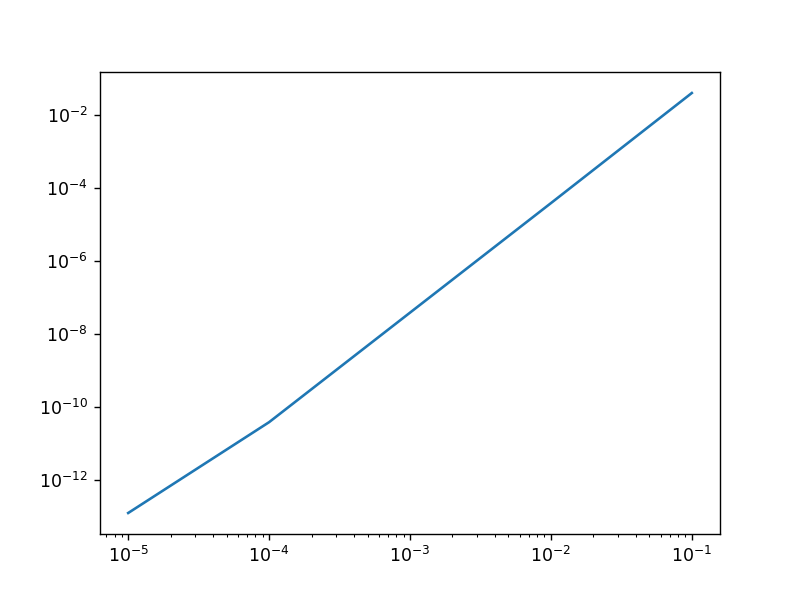

In [119]:
deltaE = np.empty((5))
tau = np.empty((5))
for i in range(5):
    tt, u0, u1 = RungeKutta_matrix(A, u00=u[0], u10=u[1], T=50*period, dt=0.1**(i+1))
    N = tt.shape[0] - 1
    deltaE[i] = (u1[N]**2)/2 + omega**(2)*(u0[N]**2)/2 - (u1[0]**2)/2 - omega**(2)*(u0[0]**2)/2
    tau[i] = 0.1**(i+1)
    
figure = pylab.figure()
axes = figure.add_subplot (1, 1, 1)
pylab.plot(tau, deltaE)
axes.set_yscale('log')
axes.set_xscale('log')
pylab.show()

RK also gives energy difference $\Delta E \sim \tau$.

Compare change of energy for Eulers implicit method and RK. Time interval: 5 vs 50, $\Delta E$  at  $\tau = 0.01$  :  $10 \: vs \: 10^{-3}$. See that RK works several orders better. 